# Run TARDIS workflow

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from stella_to_tardis_parser import parse_stella_models_to_tardis_configs

from tardis.workflows.v_inner_solver import InnerVelocitySolverWorkflow
from tardis.io.configuration.config_reader import Configuration
from tardis.io.model import read_stella_model
from tardis.util.base import atomic_number2element_symbol


# Convert stella model to TARDIS config 

Uncomment and run this following cell if you have not yet convert the stella model into tardis config files 

In [ ]:
# STELLA_model_folder_fpath = Path.cwd() / "example_stella_explosion"

# tardis_example_config_folder_path = Path.cwd() / "TARDIS_template_configs"

# tardis_config_folder = STELLA_model_folder_fpath / "tardis_configs"

# INTERPOLATE_MASS_FRACTIONS = True  # boolean, if True then interpolate the mass fractions from MESA profile onto STELLA mass grid
# SKIP_NONHOMOLOGOUS_MODELS = (
#     True  # boolean, if True then skip non-homologous models and not save them
# )
# MAX_NONHOMOLOGOUS_SHELLS = 5  # int, if active if SKIP_NONHOMOLOGOUS_MODELS is True, the maximum number of non-homologous shells to skip
# TAU_UPPER_LIMIT = 1e3  # False or float, filter out the shells that has tau larger than this value
# TAU_LOWER_LIMIT = 1e-10  # False or float, filter out the shells that has tau lower than this value
# SHRINK_SHELL_NUMBER = False  # False or int, if int then end up with this int as total shell numbers that keep the velocity range but lower the grid resolution
# L_NUC_RATIO_UPPER_LIMIT = (
#     0.8  # default 0.8, criteria to determine if the photosphere holds, means L_nuc/L_bol <= 0.8
# )

# parse_stella_models_to_tardis_configs(
#     STELLA_model_folder_fpath,
#     tardis_example_config_folder_path,
#     tardis_config_output_folder_path=None,
#     interpolate_mass_fractions=INTERPOLATE_MASS_FRACTIONS,
#     skip_nonhomologous_models=SKIP_NONHOMOLOGOUS_MODELS,
#     max_nonhomologous_shells=MAX_NONHOMOLOGOUS_SHELLS,
#     tau_upper_limit=TAU_UPPER_LIMIT,
#     tau_lower_limit=TAU_LOWER_LIMIT,
#     shrink_shell_number=SHRINK_SHELL_NUMBER,
#     l_nuc_ratio_upper_limit=L_NUC_RATIO_UPPER_LIMIT,
# )

Cr60 is not valid nuiclide in tardis database.
Day 001 model converted to TARDIS config and csvy format


Setup file paths and names -- change to correct final paths in some data dir, and pick a specific day for that model

Config is output by the STELLA_to_TARDIS.ipynb notebook currently. We will want to make a pared down script for this.


In [14]:
STELLA_model_folder_fpath = Path.cwd() / "example_stella_explosion"

chosen_day = "001"

config_fname = f"Day_{chosen_day}_mesa_stella_tardis.yml"
config_fpath = STELLA_model_folder_fpath / "tardis_configs" / config_fname
config = Configuration.from_yaml(config_fpath)

Use InnerVelocitySolverWorkflow so we don't need to define an inner boundary for an arbitrary explosion model. This moves the inner boundary in tandem with solving the plasma to get a deep enough inner boundary for a physical spectrum, but not too deep where the packets will not escape from the ejecta. 

workflow.run() is where the tardis simulation actually executes. 

In [15]:
workflow = InnerVelocitySolverWorkflow(
    config, tau=2.0 / 3, mean_optical_depth="rosseland", csvy=True
)
workflow.run()

[tardis.io.model.parse_atom_data][INFO   ]  
	
	Reading Atomic Data from /Users/jing/Software/connector25/tardis-connector/example_stella_explosion/tardis_configs/kurucz_cd23_chianti_H_He.h5 (parse_atom_data.py:40)


[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /Users/jing/GDrive/MSU/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:34)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:258)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data, linelist_atoms, linelist_molecules, decay_radiation_data (base.py:262)
[tardis.io.model.parse_mass_fraction_configuration][WARNING]  
	Mass fractions have not been normalized to 1. - normalizing (parse_mass_fraction_configuration.py:168)
[tardis.model.matter.decay][INFO   ]  
	Decaying abundances for 86443.2 seconds (decay.py:101)
[tardis.plasma.properties.atomic][WARNING]  
	Zeta_data missing - replaced with 1s. Missing ions: [(11, 12), (12, 13), (14, 15), (16, 17), (18, 19), (20, 21), (21, 22), (22, 23

TqdmHBox(children=(HTML(value='Packets:\u2007\u2007\u2007', layout=Layout(width='6%')), FloatProgress(value=0.…

[py.warnings         ][WARNING]  
	/Users/jing/mambaforge/envs/tardis/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning:

overflow encountered in exp

 (warnings.py:112)
[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 2 of 50 (v_inner_solver.py:413)
[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 3 of 50 (v_inner_solver.py:413)
[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 4 of 50 (v_inner_solver.py:413)
[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 1/6 consecutive times. (v_inner_solver.py:305)
[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 5 of 50 (v_inner_solver.py:413)
[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 2/6 consecutive times. (v_inner_solver.py:305)
[tardis.workflows.v_inner_solver][INFO   ]  
	
	Starting iteration 6 of 50 (v_inner_solver.py:413)
[tardis.workflows.v_inner_solver][INFO   ]  
	Iteration converged 3/6 consecutive ti

# Check the spectrum

[py.warnings         ][WARNING]  
	<>:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)
[py.warnings         ][WARNING]  
	<>:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)
[py.warnings         ][WARNING]  
	<>:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)


[py.warnings         ][WARNING]  
	<>:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)
[py.warnings         ][WARNING]  
	/var/folders/76/8ftp_ypx6dl85qg0_ngn_jpc0000gn/T/ipykernel_78674/1871003197.py:10: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)
[py.warnings         ][WARNING]  
	/var/folders/76/8ftp_ypx6dl85qg0_ngn_jpc0000gn/T/ipykernel_78674/1871003197.py:11: SyntaxWarning:

invalid escape sequence '\A'

 (warnings.py:112)


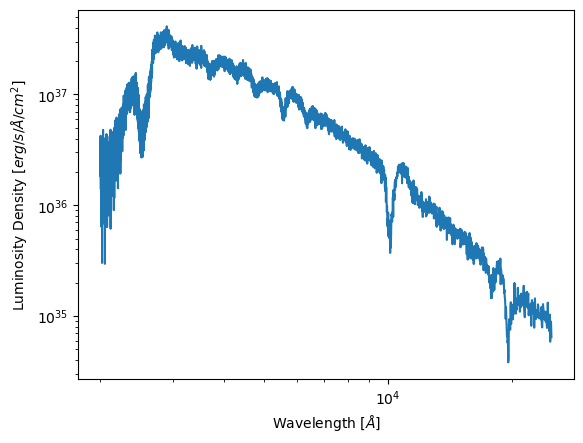

In [16]:
spectrum = workflow.spectrum_solver.spectrum_real_packets
# spectrum = workflow.spectrum_solver.spectrum_integrated

wavelength = spectrum.wavelength.value[
    ::-1
]  # in Angstrom , [::-1] to make it in increasing order in wavelength
lum_dens = spectrum.luminosity_density_lambda.value[::-1]  # in erg/s/Angstrom/cm^2

plt.plot(wavelength, lum_dens)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Luminosity Density [$erg/s/\AA/cm^2$]")
plt.yscale("log")
plt.xscale("log")

# Compare radiative properties 

Below are some diagnostics to see if the tardis model created from stella is similar to the stella model it was created from. Note that TARDIS only needs the outermost layers, at or nearby the optically thin region.

We start by loading in the mesa model.

In [17]:
model_fname = f"mesa.day{chosen_day}_post_Lbol_max.data"
stella_model = read_stella_model(STELLA_model_folder_fpath / "res" / model_fname)

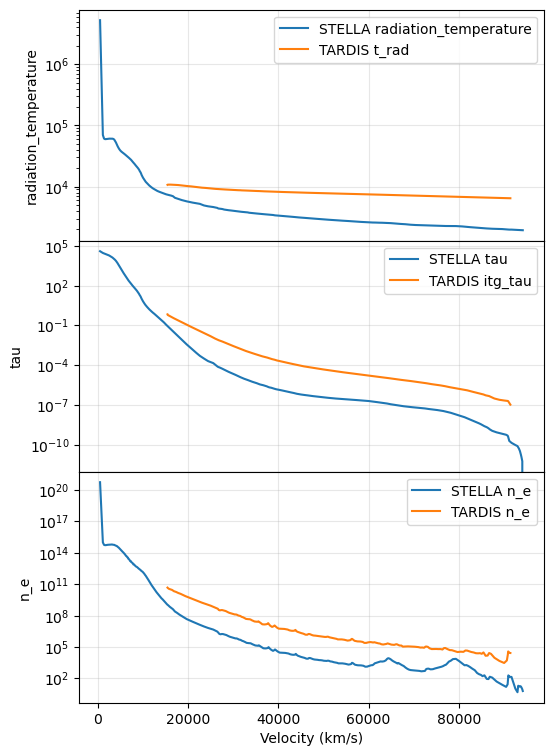

In [18]:
df_model_all_columns = stella_model.data

compare_stella_cols = ["radiation_temperature", "tau", "n_e"]
compare_tardis_values = [
    workflow.simulation_state.t_radiative,
    np.exp(workflow.final_integrated_tau),
    workflow.plasma_solver.electron_densities.values[-workflow.simulation_state.no_of_shells :],
]
tardis_labels = ["t_rad", "itg_tau", "n_e"]

fig, axes = plt.subplots(
    len(compare_stella_cols), 1, figsize=(6, len(compare_stella_cols) * 3), sharex=True
)
fig.subplots_adjust(hspace=0.0)

for i, ax in enumerate(axes):
    ax.plot(
        df_model_all_columns["cell_center_v"] / 1e5,
        df_model_all_columns[compare_stella_cols[i]],
        label=f"STELLA {compare_stella_cols[i]}",
        color="tab:blue",
    )
    ax.plot(
        workflow.simulation_state.v_inner / 1e5,
        compare_tardis_values[i],
        label=f"TARDIS {tardis_labels[i]}",
        color="tab:orange",
    )
    ax.set_xlabel("Velocity (km/s)")
    ax.set_ylabel(compare_stella_cols[i])
    ax.set_yscale("log")
    ax.grid(alpha=0.3)
    ax.legend()


# Tardis visualization and diagnostic tools

In [19]:
from tardis.visualization import SDECPlotter, LIVPlotter, LineInfoWidget, GrotrianWidget
from astropy import units as u

This cell is a hack at the time of the 2025 connector to pass an appropriate object to the SDEC and LIV plotters, when using a workflow instead of a tardis simulation object.

In [20]:
class DummySimForPlots:
    class DummyTransport:
        def __init__(self, transport_state):
            self.transport_state = transport_state

    def __init__(self, plasma, spectrum_solver, simulation_state, transport_state):
        self.plasma = plasma
        self.spectrum_solver = spectrum_solver
        self.simulation_state = simulation_state
        self.transport = self.DummyTransport(transport_state)


In [21]:
dummy_sim = DummySimForPlots(
    workflow.plasma_solver,
    workflow.spectrum_solver,
    workflow.simulation_state,
    workflow.transport_state,
)

In [22]:
plotter = SDECPlotter.from_simulation(dummy_sim)

Below is a spectral decomposition plot, showing which elements contribute to absorption and emission at each wavelength. 

Note that the tardis spectrum is wider than this plot is showing by default, from 2000 to 25000 angstroms, but set in the config for the run.

In [23]:
plotter.generate_plot_mpl(packet_wvl_range=[5000, 10000] * u.AA)

ValueError: SDECPlotter doesn't have any data for virtual packets population and SDEC plot for the same was requested. Either set virtual_packet_logging: True in your configuration file to generate SDEC plot with virtual packets, or pass packets_mode='real' in your function call to generate SDEC plot with real packets.

In [ ]:
livplot = LIVPlotter.from_simulation(dummy_sim)

Below is a last interaction velocity plot, showing where in the ejecta photons interact with certain elements. 

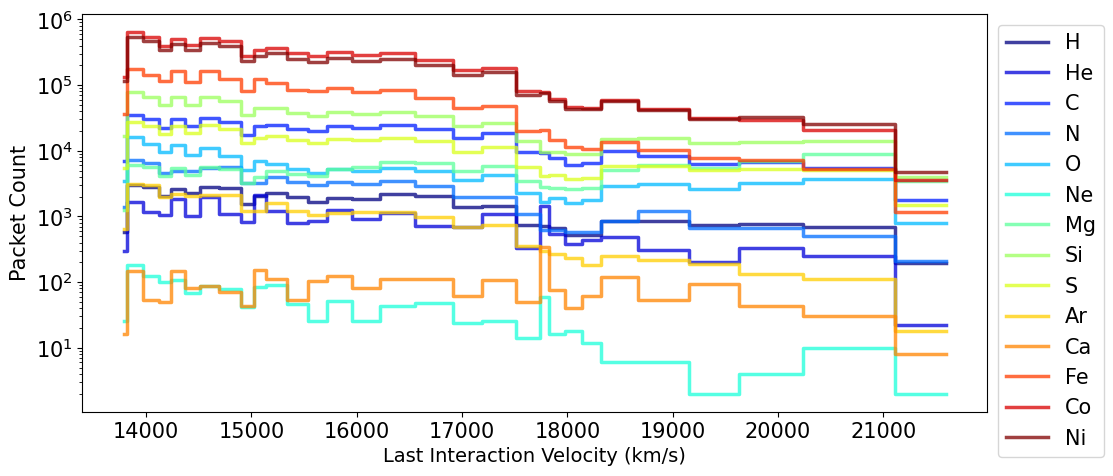

In [ ]:
livplot.generate_plot_mpl()
plt.yscale("log")

Here we check to see the mass fractions of certain elements throughout the ejecta. It will be uniform for the outer ejecta, but non-uniform when mixing reaches into the photosphere, which can happen when more of the ejecta is optically thin.

The cell immediately below the plot shows raw mass fractions per shell in a dataframe. 

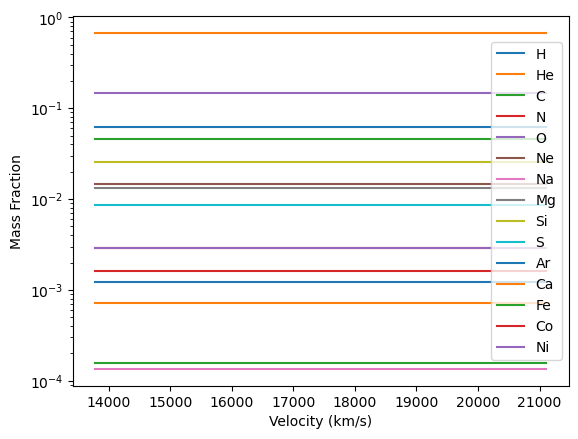

In [ ]:
plt.plot(
    workflow.simulation_state.v_inner / 1e5,
    workflow.simulation_state.composition.elemental_mass_fraction.iloc[
        :, -workflow.simulation_state.no_of_shells :
    ].T,
)
plt.legend(
    [
        atomic_number2element_symbol(atomic_num)
        for atomic_num in workflow.simulation_state.composition.elemental_mass_fraction.index.values
    ]
)
plt.xlabel("Velocity (km/s)")
plt.ylabel("Mass Fraction")

plt.yscale("log")

In [ ]:
workflow.simulation_state.composition.elemental_mass_fraction.iloc[
    :, -workflow.simulation_state.no_of_shells :
]

,369,370,371,372,373,374,375,376,377,378,...,389,390,391,392,393,394,395,396,397,398
atomic_number,,,,,,,,,,,,,,,,,,,,,
1,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,...,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285,0.062285
2,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,...,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287,0.674287
6,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,...,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523,0.045523
7,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,...,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894,0.002894
8,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,...,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410,0.146410
10,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,...,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685,0.014685
11,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
12,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,...,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087,0.013087
14,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,...,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456,0.025456


Finally let's check some of the final thermodynamic quantities throughout the ejecta. 

Text(0, 0.5, 'Density (g/cm^3)')

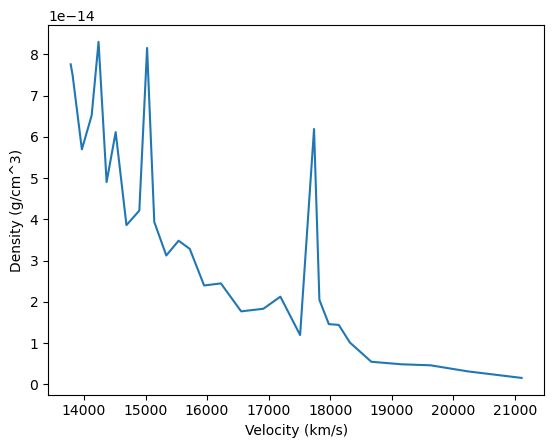

In [ ]:
plt.plot(workflow.simulation_state.v_inner / 1e5, workflow.simulation_state.density)
plt.xlabel("Velocity (km/s)")
plt.ylabel("Density (g/cm^3)")

Text(0, 0.5, 'Radiative Temperature (K)')

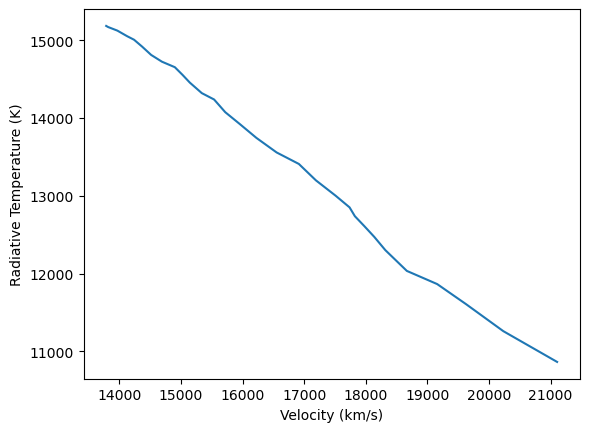

In [ ]:
plt.plot(workflow.simulation_state.v_inner / 1e5, workflow.simulation_state.t_radiative)
plt.xlabel("Velocity (km/s)")
plt.ylabel("Radiative Temperature (K)")